

This data is from data.gov.sg and data analysis project aimed at providing valuable insights into the dynamic real estate market, specifically focusing on housing resale prices and trends. This project leverages a comprehensive dataset containing information about housing transactions over several years, covering various locations, property types, and other relevant attributes. 

In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("hdb_resale.csv")
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163082 entries, 0 to 163081
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                163082 non-null  object 
 1   town                 163082 non-null  object 
 2   flat_type            163082 non-null  object 
 3   block                163082 non-null  object 
 4   street_name          163082 non-null  object 
 5   storey_range         163082 non-null  object 
 6   floor_area_sqm       163082 non-null  float64
 7   flat_model           163082 non-null  object 
 8   lease_commence_date  163082 non-null  int64  
 9   remaining_lease      163082 non-null  object 
 10  resale_price         163082 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.7+ MB


 # Lets try to optimize the memory usage

changing the `month` dtype to datetime
reformating the lease_commence_date to year 
changing  `'town', 'flat_type', 'storey_range', 'flat_model', 'block', 'street_name'`these columns to categorical datatypes 

## we reduce it from 13.7+ to 7.6+ mb

In [63]:
df['month'] = pd.to_datetime(df['month'])
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')
category_columns = ['town', 'flat_type', 'storey_range', 'flat_model', 'block', 'street_name']
for column in category_columns:
    df[column] = df[column].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163082 entries, 0 to 163081
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                163082 non-null  datetime64[ns]
 1   town                 163082 non-null  category      
 2   flat_type            163082 non-null  category      
 3   block                163082 non-null  category      
 4   street_name          163082 non-null  category      
 5   storey_range         163082 non-null  category      
 6   floor_area_sqm       163082 non-null  float64       
 7   flat_model           163082 non-null  category      
 8   lease_commence_date  163082 non-null  datetime64[ns]
 9   remaining_lease      163082 non-null  object        
 10  resale_price         163082 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(2), object(1)
memory usage: 7.6+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979-01-01,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978-01-01,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980-01-01,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980-01-01,62 years 05 months,265000.0


# Lets check for null values 

In [64]:

null_mask = df.isnull()

# Calculate the sum of missing values in each column
missing_values_sum = null_mask.sum()

# Print the sum of missing values for each column
print(missing_values_sum)


# looks like we don't have any null values,this data looks clean thats great 


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


# Lets try to see by each district and the flat type ,the mean price of each hdb flat types 

In [65]:



# Set options to display all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Creating a cross-tabulation of resale price, town, and flat type
cross_tab = pd.crosstab(index=[df['town'], df['flat_type']], columns='Resale_Price', values=df['resale_price'], aggfunc='mean')

# Rename the columns for clarity
cross_tab.columns.name = None

# Display the cross-tabulation
print(cross_tab)









                                  Resale_Price
town            flat_type                     
ANG MO KIO      2 ROOM            2.375062e+05
                3 ROOM            3.258641e+05
                4 ROOM            5.163137e+05
                5 ROOM            7.090135e+05
                EXECUTIVE         8.733649e+05
BEDOK           2 ROOM            2.413257e+05
                3 ROOM            3.197206e+05
                4 ROOM            4.738682e+05
                5 ROOM            6.135090e+05
                EXECUTIVE         7.680414e+05
BISHAN          3 ROOM            3.788523e+05
                4 ROOM            5.881602e+05
                5 ROOM            8.047985e+05
                EXECUTIVE         9.522954e+05
                MULTI-GENERATION  9.081716e+05
BUKIT BATOK     2 ROOM            3.348367e+05
                3 ROOM            3.046834e+05
                4 ROOM            4.505769e+05
                5 ROOM            6.130989e+05
             

# looks like we can briefly see the mean prices for area 

Let's dig deeper to see which how prices differentiate from each town and we'll sort them accordingly 

In [66]:
sorted_cross_tab = cross_tab.sort_values(by='Resale_Price', ascending=False)

# Display the sorted cross-tabulation
print(sorted_cross_tab)

                                  Resale_Price
town            flat_type                     
QUEENSTOWN      EXECUTIVE         1.045932e+06
CENTRAL AREA    EXECUTIVE         1.034000e+06
BUKIT TIMAH     EXECUTIVE         1.019590e+06
CENTRAL AREA    5 ROOM            1.005471e+06
BISHAN          EXECUTIVE         9.522954e+05
                MULTI-GENERATION  9.081716e+05
QUEENSTOWN      5 ROOM            8.819058e+05
ANG MO KIO      EXECUTIVE         8.733649e+05
TOA PAYOH       EXECUTIVE         8.603547e+05
BUKIT TIMAH     5 ROOM            8.548124e+05
CLEMENTI        EXECUTIVE         8.548089e+05
KALLANG/WHAMPOA EXECUTIVE         8.443143e+05
MARINE PARADE   5 ROOM            8.230297e+05
YISHUN          MULTI-GENERATION  8.104914e+05
TOA PAYOH       5 ROOM            8.066431e+05
BISHAN          5 ROOM            8.047985e+05
TAMPINES        MULTI-GENERATION  8.042995e+05
BUKIT MERAH     5 ROOM            8.042618e+05
CENTRAL AREA    4 ROOM            8.024389e+05
GEYLANG      

In [67]:
# Calculate the average resale price for each town
average_prices_by_town = df.groupby('town')['resale_price'].mean().reset_index()

# Sort the towns based on the average resale price in descending order
sorted_towns = average_prices_by_town.sort_values(by='resale_price', ascending=False)

# Display the towns and their average resale prices
print(sorted_towns)


               town   resale_price
6       BUKIT TIMAH  730025.249712
2            BISHAN  671909.041711
7      CENTRAL AREA  661931.955179
18       QUEENSTOWN  608550.425699
4       BUKIT MERAH  599594.343214
14  KALLANG/WHAMPOA  548436.578176
16        PASIR RIS  544757.790655
15    MARINE PARADE  540874.068027
21        SERANGOON  525897.156179
9          CLEMENTI  522572.122907
23        TOA PAYOH  516824.164757
22         TAMPINES  514288.190805
17          PUNGGOL  505122.822631
20         SENGKANG  486758.759200
11          HOUGANG  482432.637278
10          GEYLANG  470527.769505
5     BUKIT PANJANG  467258.249416
8     CHOA CHU KANG  454096.486081
3       BUKIT BATOK  449615.171674
12      JURONG EAST  448355.423709
1             BEDOK  447896.181371
0        ANG MO KIO  445078.983401
19        SEMBAWANG  445057.673269
24        WOODLANDS  436304.748904
13      JURONG WEST  431897.932465
25           YISHUN  414730.004176


# Let's visualize this data

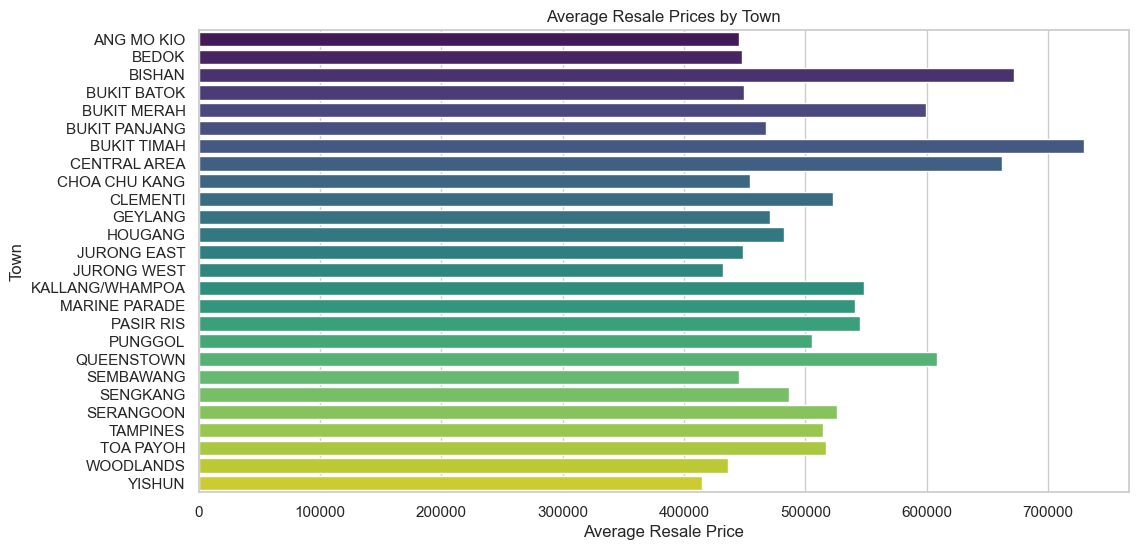

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot to visualize average resale prices by town
plt.figure(figsize=(12, 6))
sns.barplot(x="resale_price", y="town", data=sorted_towns, palette="viridis")

# Set plot labels and title
plt.xlabel("Average Resale Price")
plt.ylabel("Town")
plt.title("Average Resale Prices by Town")

# Show the plot
plt.show()


 looks like  
 - BISHAN,CENTRAL AREA AND BUKIT TIMAH seems to be above average resale prices which close to `700k` then the rest of the district. 
 - Follow by Queenstown and BUKIT MERAH around `600k`. Perhaps it is easier to commute to cbd area from these places hence the prices are above average
- Meanwhile the rest of the average district seems to range from `400-500k` range. 

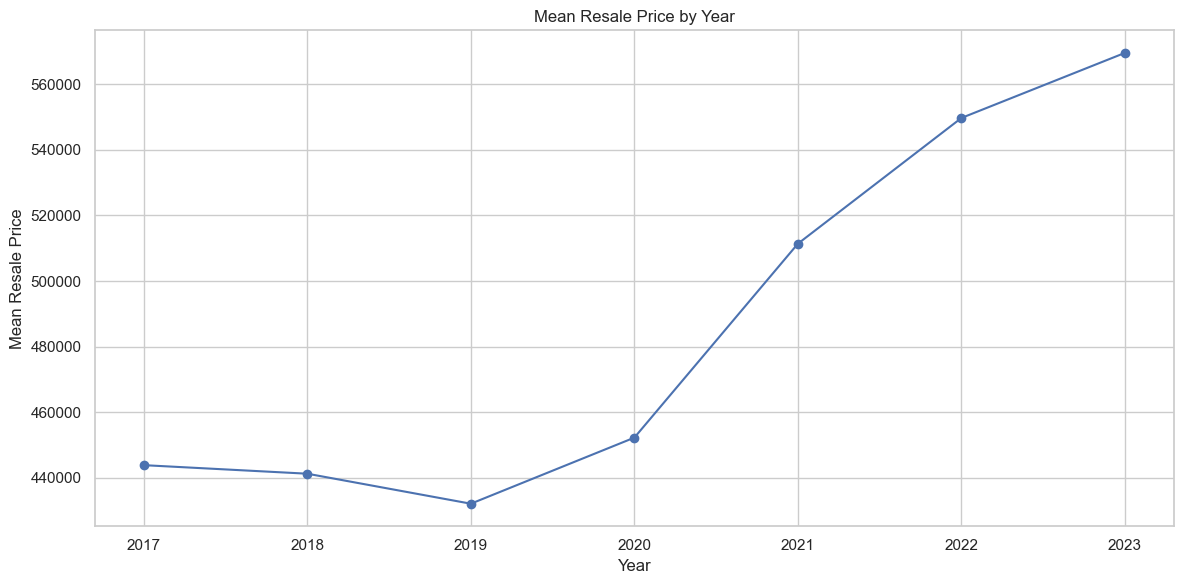

In [69]:

import matplotlib.pyplot as plt

# Assuming 'df' contains your DataFrame
# Convert 'month' column to datetime if it's not already
df['month'] = pd.to_datetime(df['month'])

# Extract the year and create a new 'year' column
df['year'] = df['month'].dt.year

# Group the data by year and calculate the mean resale price for each year
mean_prices_by_year = df.groupby('year')['resale_price'].mean()

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(mean_prices_by_year.index, mean_prices_by_year.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Mean Resale Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Resale Price')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [70]:
# Filter the data for the years 2017 to 2019
df_2017_to_2019 = df[(df['year'] >= 2017) & (df['year'] <= 2019)]

# Calculate the mean resale price for these years
mean_resale_price_2017_to_2019 = df_2017_to_2019['resale_price'].mean()

print("Mean Resale Price for 2017 to 2019:", mean_resale_price_2017_to_2019)


Mean Resale Price for 2017 to 2019: 438956.7352395108


# it looks like the prices trend rise rapidly from 2020 onwards
- INFLUX OF 'YOUNGER' RESALE FLATS

From 2011 to 2014, the government drastically increased the supply of new Build-to-Order (BTO) HDB flats in response to the strong housing demand. These flats were constructed within three to four years.

As a result, the number of HDB flats that reached the end of their five-year Minimum Occupation Period (MOP) and could potentially be sold in the resale market increased sharply in 2019 and 2020. The robust supply of such new flats is expected to continue to 2022. 

[source](https://www.businesstimes.com.sg/property/property-2021-april-issue/are-rising-hdb-prices-new-normal#:~:text=INFLUX%20OF%20%27YOUNGER%27%20RESALE%20FLATS&text=As%20a%20result%2C%20the%20number,expected%20to%20continue%20to%202022.)
- 
- changes of cpf policy when buying house 
'Buyers now have the option to secure an HDB housing loan with a maximum Loan-to-Value (LTV) limit of 90 percent, regardless of whether the flat has less than 60 years left on its lease. However, to be eligible for the full 90 percent LTV, the remaining lease of the flat must be sufficient to cover the youngest buyer until they reach the age of 95.

In cases where the remaining lease cannot cover the youngest buyer until age 95, buyers can still obtain an HDB loan, but the LTV limit will be adjusted proportionally based on how much of the remaining lease can cover the youngest buyer until age 95.

The LTV limit represents the highest percentage of the purchase price or flat value that a flat buyer can borrow as a loan. The actual loan amount is subject to a credit assessment, which considers factors such as the buyers' income and age.'
[source](https://www.cea.gov.sg/docs/default-source/module/newsletter/2-2019/new-rules-on-cpf-usage-and-hdb-loans-to-give-buyers-more-flexibility-ensure-homes-for-life.html)

In [71]:
# Filter the data for the years 2017 to 2019
df_2017_to_2019 = df[(df['year'] >= 2017) & (df['year'] <= 2019)]

# Group the data by 'town' (district) and calculate the mean resale price for each district
mean_resale_price_by_district = df_2017_to_2019.groupby('town')['resale_price'].mean().reset_index()

# Rename the columns for clarity
mean_resale_price_by_district.columns = ['District', 'Mean Resale Price']

# Sort the data by mean resale price in descending order
df_2017_to_2019 = mean_resale_price_by_district.sort_values(by='Mean Resale Price', ascending=False)

# Display the result
print(df_2017_to_2019)


           District  Mean Resale Price
6       BUKIT TIMAH      714816.973545
2            BISHAN      644789.631703
7      CENTRAL AREA      623540.791209
4       BUKIT MERAH      563847.905490
18       QUEENSTOWN      554874.130847
15    MARINE PARADE      518326.118252
14  KALLANG/WHAMPOA      495996.238393
23        TOA PAYOH      494166.753205
16        PASIR RIS      492123.087146
21        SERANGOON      490769.093444
22         TAMPINES      474205.320343
9          CLEMENTI      469028.611547
17          PUNGGOL      453269.613725
20         SENGKANG      433994.118262
10          GEYLANG      430605.671815
11          HOUGANG      429212.746103
5     BUKIT PANJANG      428196.386326
12      JURONG EAST      416185.774550
0        ANG MO KIO      411512.699656
1             BEDOK      410892.847655
13      JURONG WEST      387879.453112
8     CHOA CHU KANG      384960.081203
19        SEMBAWANG      378804.188073
3       BUKIT BATOK      377715.275704
24        WOODLANDS      

In [72]:
# Filter the data for the years 2019 onwards
df_2019_onwards = df[df['year'] >= 2019]

# Group the data by 'town' (district) and calculate the mean resale price for each district
mean_resale_price_by_district = df_2019_onwards.groupby('town')['resale_price'].mean().reset_index()

# Rename the columns for clarity
mean_resale_price_by_district.columns = ['District', 'Mean Resale Price']

# Sort the data by mean resale price in descending order
df_filtered_2019_onwards = mean_resale_price_by_district.sort_values(by='Mean Resale Price', ascending=False)

# Display the result
print(df_filtered_2019_onwards)


           District  Mean Resale Price
6       BUKIT TIMAH      736527.341879
2            BISHAN      679355.660311
7      CENTRAL AREA      674328.914477
18       QUEENSTOWN      624986.447927
4       BUKIT MERAH      612082.063856
14  KALLANG/WHAMPOA      569027.668426
16        PASIR RIS      563133.557271
15    MARINE PARADE      543696.977778
21        SERANGOON      539715.019708
9          CLEMENTI      537233.635709
22         TAMPINES      525843.707602
17          PUNGGOL      522037.312824
23        TOA PAYOH      519429.234706
20         SENGKANG      504221.509100
11          HOUGANG      499076.849998
10          GEYLANG      482059.439484
5     BUKIT PANJANG      478914.211923
3       BUKIT BATOK      476215.689594
8     CHOA CHU KANG      475187.539974
19        SEMBAWANG      466083.991423
12      JURONG EAST      458731.240949
1             BEDOK      458289.853342
24        WOODLANDS      458021.899313
0        ANG MO KIO      453470.404236
13      JURONG WEST      

In [73]:
# Calculate the mean resale price differences between the two DataFrames
mean_resale_price_difference = df_filtered_2019_onwards['Mean Resale Price'] - df_2017_to_2019['Mean Resale Price']

# Create a new column 'Mean_Resale_Price_Difference' in one of the DataFrames to store the differences
df_filtered_2019_onwards['Mean_Resale_Price_Difference'] = mean_resale_price_difference


df_filtered_2019_onwards_sorted = df_filtered_2019_onwards.sort_values(by='Mean_Resale_Price_Difference', ascending=False)

# Reset the index for better readability (optional)
df_filtered_2019_onwards_sorted.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(df_filtered_2019_onwards_sorted[['District', 'Mean Resale Price', 'Mean_Resale_Price_Difference']])


           District  Mean Resale Price  Mean_Resale_Price_Difference
0       BUKIT BATOK      476215.689594                  98500.413891
1     CHOA CHU KANG      475187.539974                  90227.458771
2         SEMBAWANG      466083.991423                  87279.803350
3         WOODLANDS      458021.899313                  81211.115031
4            YISHUN      433209.426298                  73220.700473
5   KALLANG/WHAMPOA      569027.668426                  73031.430033
6         PASIR RIS      563133.557271                  71010.470125
7          SENGKANG      504221.509100                  70227.390839
8        QUEENSTOWN      624986.447927                  70112.317080
9           HOUGANG      499076.849998                  69864.103895
10          PUNGGOL      522037.312824                  68767.699099
11         CLEMENTI      537233.635709                  68205.024162
12      JURONG WEST      450501.157283                  62621.704171
13         TAMPINES      525843.70

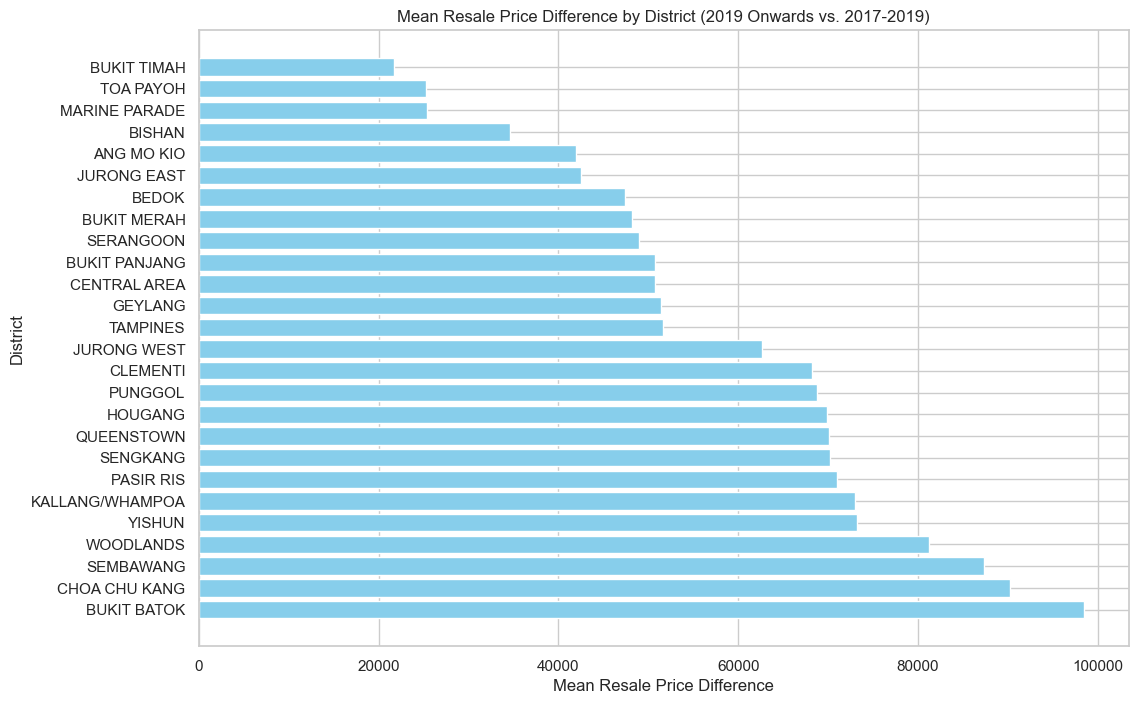

In [74]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart
plt.barh(df_filtered_2019_onwards_sorted['District'], df_filtered_2019_onwards_sorted['Mean_Resale_Price_Difference'], color='skyblue')

# Add labels and title
plt.xlabel('Mean Resale Price Difference')
plt.ylabel('District')
plt.title('Mean Resale Price Difference by District (2019 Onwards vs. 2017-2019)')

# Show the plot
plt.show()


looks like `cck and bukit batok` price rose massively `above 90k differences` and I am seeing 
`kallang,pasir ris and queestown` area too since they rose decently considering their mean price during 2017-2019 was above average of `550k`



In [75]:

# Filter data for the year 2019 onwards
df_2019_onwards = df[df['year'] >= 2019]


df_2019_onwards.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42070,2019-01-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978-01-01,58 years,230000.0,2019
42071,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,60.0,Improved,1986-01-01,66 years,235000.0,2019
42072,2019-01-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1979-01-01,59 years,238000.0,2019
42073,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,61.0,Improved,1986-01-01,66 years 01 month,240000.0,2019
42074,2019-01-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,01 TO 03,68.0,New Generation,1980-01-01,60 years 08 months,240000.0,2019


In [76]:
df_2019_onwards['town'].value_counts()

SENGKANG           10481
PUNGGOL             9270
YISHUN              8653
WOODLANDS           8324
TAMPINES            8208
JURONG WEST         7469
BEDOK               6464
HOUGANG             6009
CHOA CHU KANG       5721
ANG MO KIO          4806
BUKIT PANJANG       4670
BUKIT MERAH         4569
BUKIT BATOK         4240
TOA PAYOH           3710
PASIR RIS           3693
KALLANG/WHAMPOA     3584
QUEENSTOWN          3411
SEMBAWANG           3162
GEYLANG             3026
CLEMENTI            2778
JURONG EAST         2403
BISHAN              2188
SERANGOON           2125
CENTRAL AREA         985
MARINE PARADE        765
BUKIT TIMAH          298
Name: town, dtype: int64

Looks like we should consider `Sengkang,Puggol,Yishun And woodlands` district for analysis since it has high resale listings ,we wouldnt consider analysing `tampines` since we're interested with only mean diff above `60k`

In [77]:
selected_towns = ['SENGKANG', 'PUNGGOL', 'YISHUN', 'WOODLANDS', 'KALLANG/WHAMPOA',
                  'QUEENSTOWN', 'CHOA CHU KANG', 'BUKIT BATOK', 'PASIR RIS'] 

# Use loc to filter the DataFrame for the selected towns
filtered_df = df_2019_onwards.loc[df_2019_onwards['town'].isin(selected_towns)]

# Display the resulting DataFrame
filtered_df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42265,2019-01-01,BUKIT BATOK,3 ROOM,269,BT BATOK EAST AVE 4,07 TO 09,64.0,Simplified,1986-01-01,66 years 09 months,231000.0,2019
42266,2019-01-01,BUKIT BATOK,3 ROOM,318,BT BATOK ST 32,10 TO 12,68.0,New Generation,1986-01-01,66 years 03 months,233000.0,2019
42267,2019-01-01,BUKIT BATOK,3 ROOM,148,BT BATOK WEST AVE 6,04 TO 06,68.0,New Generation,1984-01-01,64 years 07 months,233000.0,2019
42268,2019-01-01,BUKIT BATOK,3 ROOM,422,BT BATOK WEST AVE 2,07 TO 09,68.0,New Generation,1988-01-01,68 years 06 months,233000.0,2019
42269,2019-01-01,BUKIT BATOK,3 ROOM,267,BT BATOK EAST AVE 4,01 TO 03,64.0,Simplified,1987-01-01,67 years,238000.0,2019


In [78]:
cross_tab_1 = pd.crosstab(index=filtered_df['town'], columns=filtered_df['flat_type'])

# Display the cross-tabulation
print(cross_tab_1)


flat_type        2 ROOM  3 ROOM  4 ROOM  5 ROOM  EXECUTIVE  MULTI-GENERATION
town                                                                        
BUKIT BATOK          49    1263    1779     731        418                 0
CHOA CHU KANG        58     389    2732    1989        553                 0
KALLANG/WHAMPOA      56    1496    1341     610         81                 0
PASIR RIS            37     108    1466    1172        910                 0
PUNGGOL             254    1013    4912    2940        151                 0
QUEENSTOWN           91    1413    1407     470         30                 0
SENGKANG            223     765    5287    3614        592                 0
WOODLANDS           131    1040    3653    2550        950                 0
YISHUN              166    2280    4155    1611        413                28


look likes `punggol` `sengkang` `yishun` and `woodlands` have way above 4room average resale counts,lets dig deeper to see how the housing in these area are like,we'll try to understand why they have such high volume. Lets first find out how each of these area and the flat types mean resale housing prices are like 


In [79]:


# Create a cross-tabulation of 'town' and 'flat_type' with mean resale price
cross_tab_2 = pd.crosstab(index=filtered_df['town'], columns=filtered_df['flat_type'],
                        values=filtered_df['resale_price'], aggfunc='mean')

# Display the cross-tabulation
print(cross_tab_2)


flat_type               2 ROOM         3 ROOM         4 ROOM         5 ROOM  \
town                                                                          
BUKIT BATOK      334836.734694  322465.193191  472197.014615  637990.110643   
CHOA CHU KANG    259858.620690  352353.923368  437891.080161  517563.162896   
KALLANG/WHAMPOA  245285.714286  390992.145722  668633.428516  777099.852459   
PASIR RIS        295864.864865  414740.583333  488168.356753  570574.644198   
PUNGGOL          287911.015748  405203.086871  513549.355839  591710.635714   
QUEENSTOWN       278948.087912  401769.608634  771120.634684  896575.548681   
SENGKANG         287406.188341  387568.220915  483644.358805  551300.668201   
WOODLANDS        272903.450382  318553.887500  417104.851048  495818.297255   
YISHUN           273098.722892  330136.292544  424215.824520  549696.775916   

flat_type           EXECUTIVE  MULTI-GENERATION  
town                                             
BUKIT BATOK      6.915424e+05 

Worth taking a note at `queenstown` and `kallang/whampoa` area as the prices seems way above the mean, it will be in our analysis after we first find out about how `sengkang puggol yishun and woodlands` area are doing

In [80]:
# List of selected towns
selected_towns = ['SENGKANG','PUNGGOL','YISHUN','WOODLANDS']


# Filter the DataFrame for the selected towns and '4 ROOM' flat type
filtered_df_4_room = df_2019_onwards[(df_2019_onwards['town'].isin(selected_towns)) & (df_2019_onwards['flat_type'] == '4 ROOM')]

# Count the occurrences of 'flat_model' in the filtered DataFrame
flat_model_counts_4_room = filtered_df_4_room['flat_model'].value_counts()

# Display the counts for 'flat_model' in the selected towns for 4-room flats
print("Flat Model Counts in Selected Towns for 4-Room Flats:")
print(flat_model_counts_4_room)


Flat Model Counts in Selected Towns for 4-Room Flats:
Model A                   10162
Premium Apartment          5081
Simplified                 1249
New Generation              719
Model A2                    596
DBSS                        157
Improved                     43
Type S1                       0
Terrace                       0
Standard                      0
Premium Maisonette            0
Premium Apartment Loft        0
2-room                        0
Multi Generation              0
3Gen                          0
Model A-Maisonette            0
Maisonette                    0
Improved-Maisonette           0
Apartment                     0
Adjoined flat                 0
Type S2                       0
Name: flat_model, dtype: int64


do note that in this analysis is just `model A and premium apartment` flat type and `4-room` which is above `80 yrs of remaining lease`  

In [81]:
# Define the list of selected towns
selected_towns = ['SENGKANG', 'PUNGGOL', 'YISHUN','WOODLANDS']

# Define the list of desired flat models
desired_flat_models = ['Model A', 'Premium Apartment']

# Filter the DataFrame for the selected towns and flat models
filtered_df = df_2019_onwards[(df_2019_onwards['town'].isin(selected_towns)) &
                              (df_2019_onwards['flat_type'] == '4 ROOM') &
                              (df_2019_onwards['flat_model'].isin(desired_flat_models))]

# Display the filtered DataFrame
filtered_df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42927,2019-01-01,PUNGGOL,4 ROOM,175A,PUNGGOL FIELD,16 TO 18,90.0,Model A,2003-01-01,83 years 08 months,355000.0,2019
42928,2019-01-01,PUNGGOL,4 ROOM,176C,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2003-01-01,83 years 07 months,365000.0,2019
42929,2019-01-01,PUNGGOL,4 ROOM,195A,PUNGGOL RD,01 TO 03,90.0,Premium Apartment,2007-01-01,87 years 07 months,380000.0,2019
42930,2019-01-01,PUNGGOL,4 ROOM,602A,PUNGGOL CTRL,01 TO 03,93.0,Model A,2012-01-01,92 years 06 months,384000.0,2019
42931,2019-01-01,PUNGGOL,4 ROOM,635A,PUNGGOL DR,07 TO 09,91.0,Premium Apartment,2007-01-01,87 years 11 months,395000.0,2019


In [82]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15243 entries, 42927 to 162784
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                15243 non-null  datetime64[ns]
 1   town                 15243 non-null  category      
 2   flat_type            15243 non-null  category      
 3   block                15243 non-null  category      
 4   street_name          15243 non-null  category      
 5   storey_range         15243 non-null  category      
 6   floor_area_sqm       15243 non-null  float64       
 7   flat_model           15243 non-null  category      
 8   lease_commence_date  15243 non-null  datetime64[ns]
 9   remaining_lease      15243 non-null  object        
 10  resale_price         15243 non-null  float64       
 11  year                 15243 non-null  int64         
dtypes: category(6), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 1.

In [83]:


# Extract years from the "remaining_lease" column and convert to integers
filtered_df['remaining_lease'] = filtered_df['remaining_lease'].str.extract(r'(\d+) years').astype(int)

filtered_df.head()




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42927,2019-01-01,PUNGGOL,4 ROOM,175A,PUNGGOL FIELD,16 TO 18,90.0,Model A,2003-01-01,83,355000.0,2019
42928,2019-01-01,PUNGGOL,4 ROOM,176C,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2003-01-01,83,365000.0,2019
42929,2019-01-01,PUNGGOL,4 ROOM,195A,PUNGGOL RD,01 TO 03,90.0,Premium Apartment,2007-01-01,87,380000.0,2019
42930,2019-01-01,PUNGGOL,4 ROOM,602A,PUNGGOL CTRL,01 TO 03,93.0,Model A,2012-01-01,92,384000.0,2019
42931,2019-01-01,PUNGGOL,4 ROOM,635A,PUNGGOL DR,07 TO 09,91.0,Premium Apartment,2007-01-01,87,395000.0,2019


# changed the `remaining_lease` to int type for the aggregation 

In [84]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15243 entries, 42927 to 162784
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                15243 non-null  datetime64[ns]
 1   town                 15243 non-null  category      
 2   flat_type            15243 non-null  category      
 3   block                15243 non-null  category      
 4   street_name          15243 non-null  category      
 5   storey_range         15243 non-null  category      
 6   floor_area_sqm       15243 non-null  float64       
 7   flat_model           15243 non-null  category      
 8   lease_commence_date  15243 non-null  datetime64[ns]
 9   remaining_lease      15243 non-null  int64         
 10  resale_price         15243 non-null  float64       
 11  year                 15243 non-null  int64         
dtypes: category(6), datetime64[ns](2), float64(2), int64(2)
memory usage: 1.0 MB


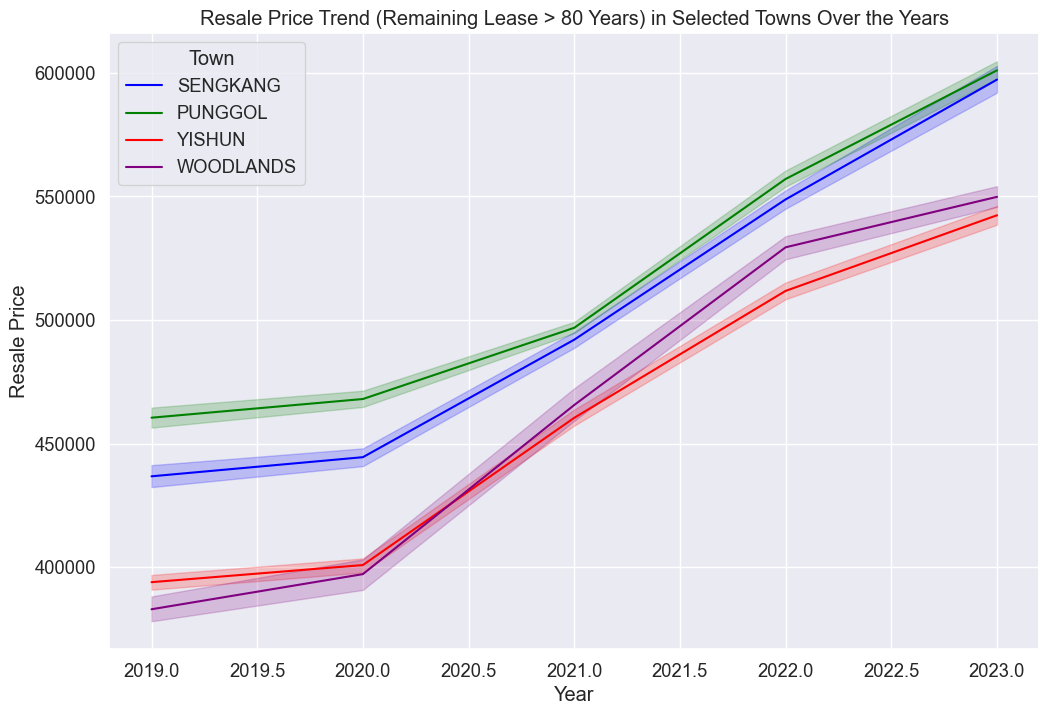

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected towns
selected_towns = ['SENGKANG', 'PUNGGOL', 'YISHUN', 'WOODLANDS']

# Define a custom color palette with unique colors for each town
custom_palette = {
    'SENGKANG': 'blue',
    'PUNGGOL': 'green',
    'YISHUN': 'red',
    'WOODLANDS': 'purple'
}

# Filter rows where remaining_lease is more than 80 years and town is in selected_towns
filtered_df1 = filtered_df[(filtered_df['remaining_lease'] > 80) & (filtered_df['town'].isin(selected_towns))]

# Create a line plot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Add grid lines
sns.set(font_scale=1.2)  # Increase font size

for town in selected_towns:
    town_data = filtered_df1[filtered_df1['town'] == town]
    sns.lineplot(data=town_data, x='year', y='resale_price', label=town, color=custom_palette[town])

# Set plot title and labels
plt.title('Resale Price Trend (Remaining Lease > 80 Years) in Selected Towns Over the Years')
plt.xlabel('Year')
plt.ylabel('Resale Price')

# Show the legend with custom positioning and matching colors
plt.legend(title='Town', loc='upper left')

# Show the plot
plt.grid(True)
plt.show()



looks like `puggol and sengkang trend is steady and linear` while `yishun and queenstown seems to be slowing down a bit`. I am gonna visualize it with scatter plot to see how these housing in these are clustered and find the `outliers` 

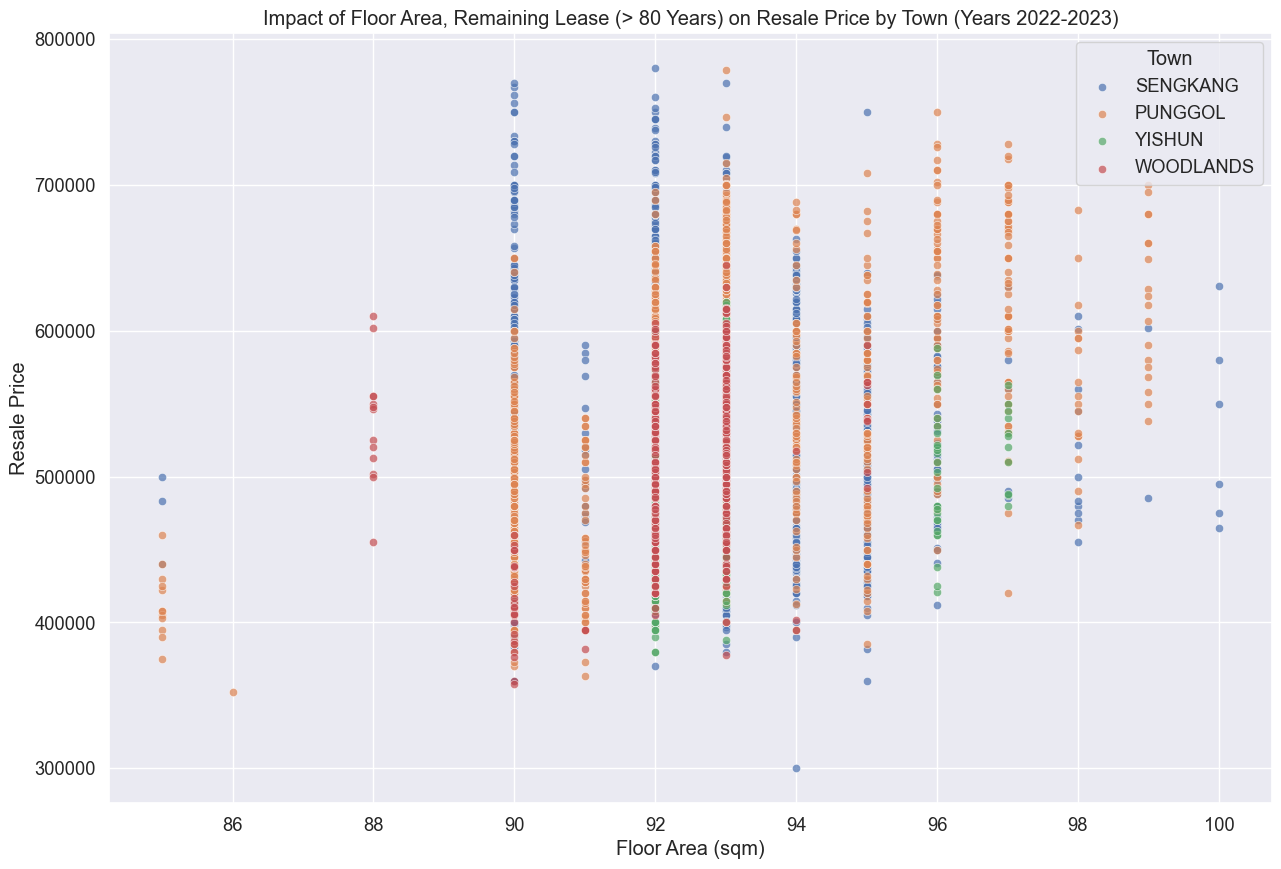

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected towns
selected_towns = ['SENGKANG', 'PUNGGOL', 'YISHUN', 'WOODLANDS']


# Filter data for the years 2022 and 2023
filtered_df1_2021_2023 = filtered_df1[(filtered_df1['year'] >= 2021) & (filtered_df1['year'] <= 2023)]

# Create a scatterplot for each town
plt.figure(figsize=(15, 10))

for town in selected_towns:
    town_data = filtered_df1_2021_2023[filtered_df1_2021_2023['town'] == town]
    sns.scatterplot(data=town_data, x='floor_area_sqm', y='resale_price', label=town, alpha=0.7)

# Set plot title and labels
plt.title('Impact of Floor Area, Remaining Lease (> 80 Years) on Resale Price by Town (Years 2022-2023)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

# Show the legend
plt.legend(title='Town')

# Show the plot
plt.grid(True)
plt.show()




`SENGKANG (Blue dots):`
There is a data point near the 500,000 price range and around 98 floor area which seems separate from the main cluster of SENGKANG points.
`

`PUNGGOL (Orange dots)`
There are no apparent outliers for PUNGGOL as most of the points seem to be within a consistent range.

`YISHUN (Green dots):`
There's a data point near the 400,000 price range and around 92 floor area which seems slightly detached from the main cluster of YISHUN points.
There's another near the 600,000 price range and around 94 floor area that's also a bit separated.

`WOODLANDS (Red dots):`
There are two data points around the 500,000 and 550,000 price range and between 90 and 92 floor area that appear separate from the main WOODLANDS cluster.


But we shouldn't just denote that they are outliers from this chart,let's dig deeper with using z-score using `resale_price` 


In [87]:


df = pd.DataFrame(filtered_df1_2021_2023)

# Calculate Z-score for 'Resale Price'
df['Z_score'] = np.abs((df['resale_price'] - df['resale_price'].mean()) / df['resale_price'].std())

# Filter out outliers
outliers = df[df['Z_score'] > 3]
outliers.head()




,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,Z_score
91553,2021-02-01,SENGKANG,4 ROOM,445B,FERNVALE RD,22 TO 24,94.0,Model A,2012-01-01,90,300000.0,2021,3.547197
138381,2022-10-01,SENGKANG,4 ROOM,216D,COMPASSVALE DR,16 TO 18,92.0,Premium Apartment,2017-01-01,93,730000.0,2022,3.061437
140420,2022-11-01,SENGKANG,4 ROOM,275C,COMPASSVALE LINK,13 TO 15,90.0,Premium Apartment,2009-01-01,85,750000.0,2022,3.368815
154459,2023-04-01,PUNGGOL,4 ROOM,272B,PUNGGOL WALK,07 TO 09,97.0,Premium Apartment,2014-01-01,90,728000.0,2023,3.030699
154473,2023-06-01,PUNGGOL,4 ROOM,271D,PUNGGOL WALK,10 TO 12,93.0,Premium Apartment,2014-01-01,89,746888.0,2023,3.320987


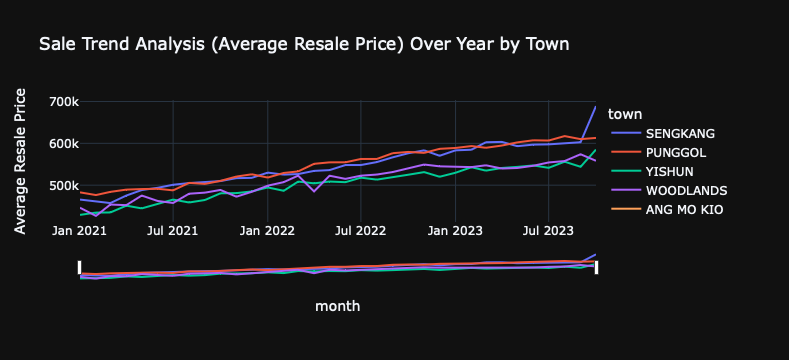

In [88]:
import plotly.express as px

# Filter for the selected towns
selected_towns = ['SENGKANG', 'PUNGGOL', 'YISHUN', 'WOODLANDS']
df_filtered = filtered_df1_2021_2023[filtered_df1_2021_2023['town'].isin(selected_towns)]

# Group by 'town' and 'month' only (excluding flat_type)
grouped = df_filtered.groupby(['town', 'month']).mean().reset_index()

# Plot the data
fig = px.line(grouped,
              x='month',
              y='resale_price',
              color='town',
              title='Sale Trend Analysis (Average Resale Price) Over Year by Town',
              labels={'resale_price': 'Average Resale Price'},
              template='plotly_dark',  
              hover_data=['resale_price'],  # Show resale price on hover
              category_orders={"town": selected_towns})  # Control the order of town colors

# Adding a range slider
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()





In [89]:
qskl = ['KALLANG/WHAMPOA', 'QUEENSTOWN']
flat_types = ['4 ROOM', '5 ROOM']

for town in qskl:
    filtered_town = df_2019_onwards[(df_2019_onwards['town'] == town) & (df_2019_onwards['flat_type'].isin(flat_types))]
    flat_counts = filtered_town['flat_model'].value_counts()
    print(f"Flat Model Value Counts for {town}:")
    print(flat_counts)
    print()


Flat Model Value Counts for KALLANG/WHAMPOA:
Model A                   805
Improved                  522
Premium Apartment         159
New Generation            156
DBSS                      130
Standard                   96
Simplified                 52
Model A-Maisonette         19
Adjoined flat              12
2-room                      0
Premium Apartment Loft      0
Type S1                     0
Terrace                     0
Premium Maisonette          0
Model A2                    0
Multi Generation            0
3Gen                        0
Maisonette                  0
Improved-Maisonette         0
Apartment                   0
Type S2                     0
Name: flat_model, dtype: int64

Flat Model Value Counts for QUEENSTOWN:
Model A                   853
Improved                  401
Premium Apartment         395
Standard                  118
Premium Apartment Loft     83
Adjoined flat              19
Terrace                     5
New Generation              3
2-room       

In [90]:
import pandas as pd

town_conditions = df_2019_onwards['town'].isin(['KALLANG/WHAMPOA','QUEENSTOWN'])
flat_types_conditions = df_2019_onwards['flat_type'].isin(['4 ROOM', '5 ROOM'])
flat_model_conditions = df_2019_onwards['flat_model'].isin(['DBSS','Model A', 'Improved', 'Premium Apartment'])

# Combine the conditions using '&' for 'AND' logic
selected_rows = df_2019_onwards[town_conditions & flat_types_conditions & flat_model_conditions]

selected_rows.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42841,2019-01-01,KALLANG/WHAMPOA,4 ROOM,38,CAMBRIDGE RD,07 TO 09,101.0,Model A,1997-01-01,77 years 10 months,585000.0,2019
42842,2019-01-01,KALLANG/WHAMPOA,4 ROOM,60,GEYLANG BAHRU,16 TO 18,100.0,Model A,1999-01-01,79 years 01 month,618000.0,2019
42843,2019-01-01,KALLANG/WHAMPOA,4 ROOM,14,UPP BOON KENG RD,10 TO 12,103.0,Model A,1999-01-01,79 years 04 months,623000.0,2019
42844,2019-01-01,KALLANG/WHAMPOA,4 ROOM,11,FARRER PK RD,13 TO 15,90.0,Model A,2004-01-01,84 years 06 months,630000.0,2019
42845,2019-01-01,KALLANG/WHAMPOA,4 ROOM,59C,GEYLANG BAHRU,16 TO 18,100.0,Model A,1998-01-01,78 years 11 months,638000.0,2019


In [91]:
# Extract the numeric part and convert it to an integer
selected_rows['remaining_lease'] = selected_rows['remaining_lease'].str.extract(r'(\d+) years').astype(int)








A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [92]:
selected_rows.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42841,2019-01-01,KALLANG/WHAMPOA,4 ROOM,38,CAMBRIDGE RD,07 TO 09,101.0,Model A,1997-01-01,77,585000.0,2019
42842,2019-01-01,KALLANG/WHAMPOA,4 ROOM,60,GEYLANG BAHRU,16 TO 18,100.0,Model A,1999-01-01,79,618000.0,2019
42843,2019-01-01,KALLANG/WHAMPOA,4 ROOM,14,UPP BOON KENG RD,10 TO 12,103.0,Model A,1999-01-01,79,623000.0,2019
42844,2019-01-01,KALLANG/WHAMPOA,4 ROOM,11,FARRER PK RD,13 TO 15,90.0,Model A,2004-01-01,84,630000.0,2019
42845,2019-01-01,KALLANG/WHAMPOA,4 ROOM,59C,GEYLANG BAHRU,16 TO 18,100.0,Model A,1998-01-01,78,638000.0,2019


In [93]:


qskl = ['KALLANG/WHAMPOA', 'QUEENSTOWN']
flat_types = ['4 ROOM', '5 ROOM']

# Filter the DataFrame for the selected towns, flat types, and remaining_lease above 80
new_filtered = selected_rows[
    (selected_rows['town'].isin(qskl)) &
    (selected_rows['flat_type'].isin(flat_types)) &
    (selected_rows['remaining_lease'] > 80)
] 

# Calculate the average resale price and average floor area_sqm for each flat model
average_data = new_filtered.groupby('flat_model')[['resale_price', 'floor_area_sqm']].mean()
average_data_cleaned = average_data.dropna()
print(average_data_cleaned)




                    resale_price  floor_area_sqm
flat_model                                      
DBSS               982409.307692      106.715385
Improved           884730.219608      111.596078
Model A            777723.154145       91.142857
Premium Apartment  886340.136751       89.184116


In [94]:
average_data_cleaned['price_per_sqm'] = average_data_cleaned['resale_price'] / average_data_cleaned['floor_area_sqm']
print(average_data_cleaned['price_per_sqm'])


flat_model
DBSS                 9205.882650
Improved             7927.968725
Model A              8533.012663
Premium Apartment    9938.318405
Name: price_per_sqm, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
# Filter the data for Kallang and Queenstown
kallang_data = new_filtered[new_filtered['town'] == 'KALLANG/WHAMPOA']
queenstown_data = new_filtered[new_filtered['town'] == 'QUEENSTOWN']

# Calculate the average resale price and average floor area_sqm for each flat model in Kallang
kallang_average_data = kallang_data.groupby('flat_model')[['resale_price', 'floor_area_sqm']].mean()

# Calculate the average resale price and average floor area_sqm for each flat model in Queenstown
queenstown_average_data = queenstown_data.groupby('flat_model')[['resale_price', 'floor_area_sqm']].mean()

# Display the average data for Kallang and Queenstown separately
print("Average Data for Kallang:")
print(kallang_average_data.dropna())

print("\nAverage Data for Queenstown:")
print(queenstown_average_data.dropna())

kallang_average_data['k_price_per_sqm'] = kallang_average_data['resale_price'] / kallang_average_data['floor_area_sqm']
print(kallang_average_data['k_price_per_sqm'].dropna())

queenstown_average_data['q_price_per_sqm'] = queenstown_average_data['resale_price'] / queenstown_average_data['floor_area_sqm']
print(queenstown_average_data['q_price_per_sqm'].dropna())




Average Data for Kallang:
                    resale_price  floor_area_sqm
flat_model                                      
DBSS               982409.307692      106.715385
Improved           806645.100917      109.082569
Model A            747814.329102       90.766467
Premium Apartment  925217.967799       94.069182

Average Data for Queenstown:
                    resale_price  floor_area_sqm
flat_model                                      
Improved           943026.643836      113.472603
Model A            801136.156250       91.437500
Premium Apartment  870690.579443       87.217722
flat_model
DBSS                 9205.882650
Improved             7394.812111
Model A              8238.883293
Premium Apartment    9835.505575
Name: k_price_per_sqm, dtype: float64
flat_model
Improved             8310.610853
Model A              8761.571087
Premium Apartment    9982.954889
Name: q_price_per_sqm, dtype: float64


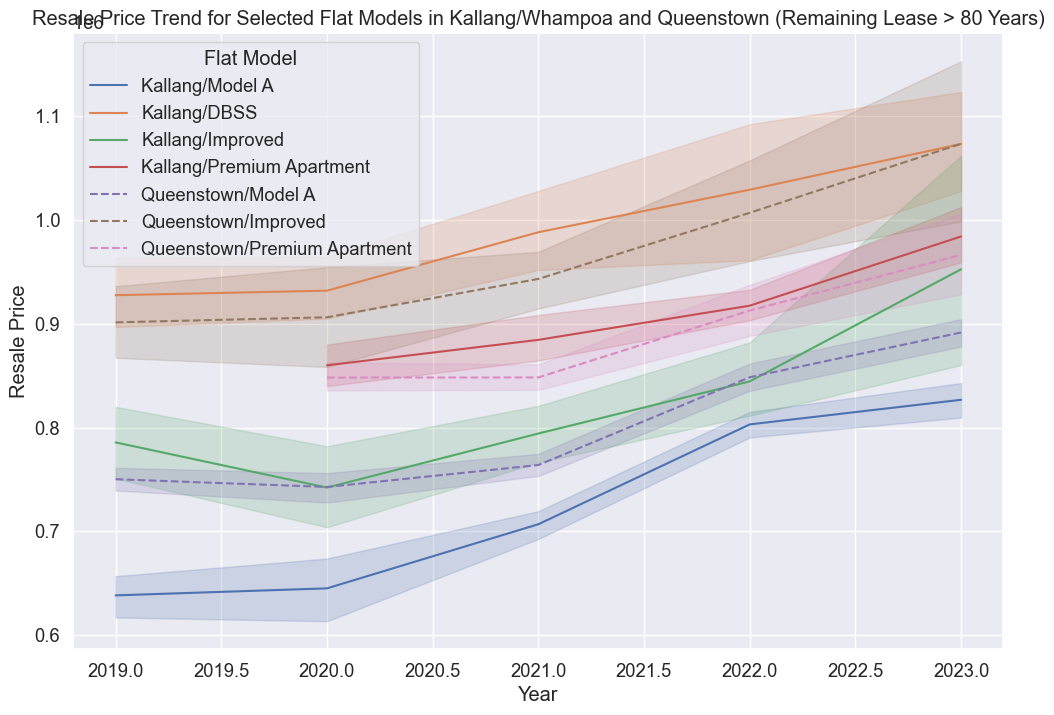

In [96]:


import seaborn as sns
import matplotlib.pyplot as plt

# List of selected towns and flat types
selected_towns = ['KALLANG/WHAMPOA', 'QUEENSTOWN']
flat_types = ['4 ROOM', '5 ROOM']

# Filter the DataFrame for Kallang/Whampoa
kallang_data = selected_rows[
    (selected_rows['town'] == 'KALLANG/WHAMPOA') &
    (selected_rows['flat_type'].isin(flat_types)) &
    (selected_rows['remaining_lease'] > 80)
]

# Filter the DataFrame for Queenstown
queenstown_data = selected_rows[
    (selected_rows['town'] == 'QUEENSTOWN') &
    (selected_rows['flat_type'].isin(flat_types)) &
    (selected_rows['remaining_lease'] > 80)
]

# Create line plots for each town
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Add grid lines
sns.set(font_scale=1.2)  # Increase font size

# Use a consistent set of line styles
line_styles = ['-', '--']

# Plot for Kallang/Whampoa
for i, flat_model in enumerate(kallang_data['flat_model'].unique()):
    flat_model_data = kallang_data[kallang_data['flat_model'] == flat_model]
    sns.lineplot(data=flat_model_data, x='year', y='resale_price', label=f'Kallang/{flat_model}', linestyle=line_styles[0])

# Plot for Queenstown
for i, flat_model in enumerate(queenstown_data['flat_model'].unique()):
    flat_model_data = queenstown_data[queenstown_data['flat_model'] == flat_model]
    sns.lineplot(data=flat_model_data, x='year', y='resale_price', label=f'Queenstown/{flat_model}', linestyle=line_styles[1])

# Set plot title and labels
plt.title('Resale Price Trend for Selected Flat Models in Kallang/Whampoa and Queenstown (Remaining Lease > 80 Years)')
plt.xlabel('Year')
plt.ylabel('Resale Price')

# Show the legend with custom positioning
plt.legend(title='Flat Model', loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


In [97]:


# Extracting outliers from the given dataframe 'filtered' and returning them
def extract_outliers(df, town):
    outlier_details = []
    
    for flat_model in df['flat_model'].unique():
        flat_model_data = df[(df['town'] == town) & (df['flat_model'] == flat_model)]
        
        # Calculate the IQR (Interquartile Range)
        Q1 = flat_model_data['resale_price'].quantile(0.25)
        Q3 = flat_model_data['resale_price'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = flat_model_data[(flat_model_data['resale_price'] < lower_bound) | (flat_model_data['resale_price'] > upper_bound)]
        
        # Calculate the average resale price for the flat model
        average_price = flat_model_data['resale_price'].mean()
        
        # Categorize outliers as "Above Average" or "Below Average"
        above_average_outliers = outliers[outliers['resale_price'] > average_price]
        below_average_outliers = outliers[outliers['resale_price'] <= average_price]
        
        if not above_average_outliers.empty:
            outlier_details.append({'flat_model': flat_model, 'category': 'Above Average', 'data': above_average_outliers})
        
        if not below_average_outliers.empty:
            outlier_details.append({'flat_model': flat_model, 'category': 'Below Average', 'data': below_average_outliers})
    
    return outlier_details

# Extract outliers for both towns
kallang_outliers = extract_outliers(selected_rows, 'KALLANG/WHAMPOA')
queenstown_outliers = extract_outliers(selected_rows, 'QUEENSTOWN')

# Combining both towns' outliers
combined_outliers = kallang_outliers + queenstown_outliers

# Value counting each segment
value_counts = {}

for outlier_entry in combined_outliers:
    key = f"{outlier_entry['flat_model']} - {outlier_entry['category']}"
    count = len(outlier_entry['data'])
    value_counts[key] = count

# Displaying the value counts
value_counts_series = pd.Series(value_counts)
print(value_counts_series)



Model A - Above Average               3
DBSS - Above Average                  2
Improved - Above Average              1
Premium Apartment - Above Average    26
Model A - Below Average               2
Premium Apartment - Below Average     3
dtype: int64


In [98]:



# Initialize dictionaries to store outlier details for Kallang/Whampoa and Queenstown
kallang_outliers = {}
queenstown_outliers = {}

selected_flat_models = selected_rows['flat_model'].unique()  # I assume you want to check for all flat models present in `filtered`

# Extract outliers for each flat model in Kallang/Whampoa
for flat_model in selected_flat_models:
    flat_model_data = selected_rows[(selected_rows['flat_model'] == flat_model) & (selected_rows['town'] == "KALLANG/WHAMPOA")]
    
    Q1 = flat_model_data['resale_price'].quantile(0.25)
    Q3 = flat_model_data['resale_price'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = flat_model_data[(flat_model_data['resale_price'] < lower_bound) | (flat_model_data['resale_price'] > upper_bound)]
    average_price = flat_model_data['resale_price'].mean()
    
    kallang_outliers[f'{flat_model} - Above Average'] = outliers[outliers['resale_price'] > average_price]
    kallang_outliers[f'{flat_model} - Below Average'] = outliers[outliers['resale_price'] <= average_price]

# Repeat the process for Queenstown
for flat_model in selected_flat_models:
    flat_model_data = selected_rows[(selected_rows['flat_model'] == flat_model) & (selected_rows['town'] == "QUEENSTOWN")]
    
    Q1 = flat_model_data['resale_price'].quantile(0.25)
    Q3 = flat_model_data['resale_price'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = flat_model_data[(flat_model_data['resale_price'] < lower_bound) | (flat_model_data['resale_price'] > upper_bound)]
    average_price = flat_model_data['resale_price'].mean()
    
    queenstown_outliers[f'{flat_model} - Above Average'] = outliers[outliers['resale_price'] > average_price]
    queenstown_outliers[f'{flat_model} - Below Average'] = outliers[outliers['resale_price'] <= average_price]

# To display or process these dataframes, you can now access them using the `kallang_outliers` and `queenstown_outliers` dictionaries. 
# For example:
print("Kallang/Whampoa Outlier Details:\n")
for category, outlier_data in kallang_outliers.items():
    if not outlier_data.empty:  # Check if the outlier data isn't empty
        print(f"{category}:")
        print(outlier_data)
        print("\n")

# Print details for Queenstown
print("Queenstown Outlier Details:\n")
for category, outlier_data in queenstown_outliers.items():
    if not outlier_data.empty:  # Check if the outlier data isn't empty
        print(f"{category}:")
        print(outlier_data)
        print("\n")
###Saving the DataFrames to CSV files
###kallang_outlier_df.to_csv('kallang_outliers.csv', index=False)
###queenstown_outlier_df.to_csv('queenstown_outliers.csv', index=False)


Kallang/Whampoa Outlier Details:

Model A - Above Average:
            month             town flat_type block   street_name storey_range  \
152669 2023-04-01  KALLANG/WHAMPOA    4 ROOM   10B  BENDEMEER RD     37 TO 39   
152684 2023-08-01  KALLANG/WHAMPOA    4 ROOM   10C  BENDEMEER RD     37 TO 39   
152685 2023-08-01  KALLANG/WHAMPOA    4 ROOM   10B  BENDEMEER RD     37 TO 39   

        floor_area_sqm flat_model lease_commence_date  remaining_lease  \
152669            93.0    Model A          2017-01-01               93   
152684            93.0    Model A          2017-01-01               93   
152685            93.0    Model A          2017-01-01               93   

        resale_price  year  
152669     1036000.0  2023  
152684     1038800.0  2023  
152685     1078000.0  2023  


DBSS - Above Average:
            month             town flat_type block   street_name storey_range  \
128744 2022-06-01  KALLANG/WHAMPOA    5 ROOM     7  BOON KENG RD     28 TO 30   
135705 2022-09-01

In [99]:



all_outliers = []

# Append the outliers from Kallang/Whampoa into the list
for category, outlier_data in kallang_outliers.items():
    if not outlier_data.empty:  
        outlier_data['Category'] = category  # add a new column to store the category
        outlier_data['Town'] = "KALLANG/WHAMPOA"  # add a new column to store the town name
        all_outliers.append(outlier_data)

# Append the outliers from Queenstown into the list
for category, outlier_data in queenstown_outliers.items():
    if not outlier_data.empty:  
        outlier_data['Category'] = category  # add a new column to store the category
        outlier_data['Town'] = "QUEENSTOWN"  # add a new column to store the town name
        all_outliers.append(outlier_data)

# Concatenate all outlier dataframes into a single dataframe
consolidated_outliers = pd.concat(all_outliers, ignore_index=True)

# Display the consolidated dataframe
consolidated_outliers.head()
# Save the consolidated outlier data to a CSV file
##consolidated_outliers.to_csv('consolidated_outliers.csv', index=False)








A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,Category,Town
0,2023-04-01,KALLANG/WHAMPOA,4 ROOM,10B,BENDEMEER RD,37 TO 39,93.0,Model A,2017-01-01,93,1036000.0,2023,Model A - Above Average,KALLANG/WHAMPOA
1,2023-08-01,KALLANG/WHAMPOA,4 ROOM,10C,BENDEMEER RD,37 TO 39,93.0,Model A,2017-01-01,93,1038800.0,2023,Model A - Above Average,KALLANG/WHAMPOA
2,2023-08-01,KALLANG/WHAMPOA,4 ROOM,10B,BENDEMEER RD,37 TO 39,93.0,Model A,2017-01-01,93,1078000.0,2023,Model A - Above Average,KALLANG/WHAMPOA
3,2022-06-01,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,28 TO 30,117.0,DBSS,2011-01-01,87,1288888.0,2022,DBSS - Above Average,KALLANG/WHAMPOA
4,2022-09-01,KALLANG/WHAMPOA,5 ROOM,7,BOON KENG RD,34 TO 36,109.0,DBSS,2011-01-01,87,1280000.0,2022,DBSS - Above Average,KALLANG/WHAMPOA


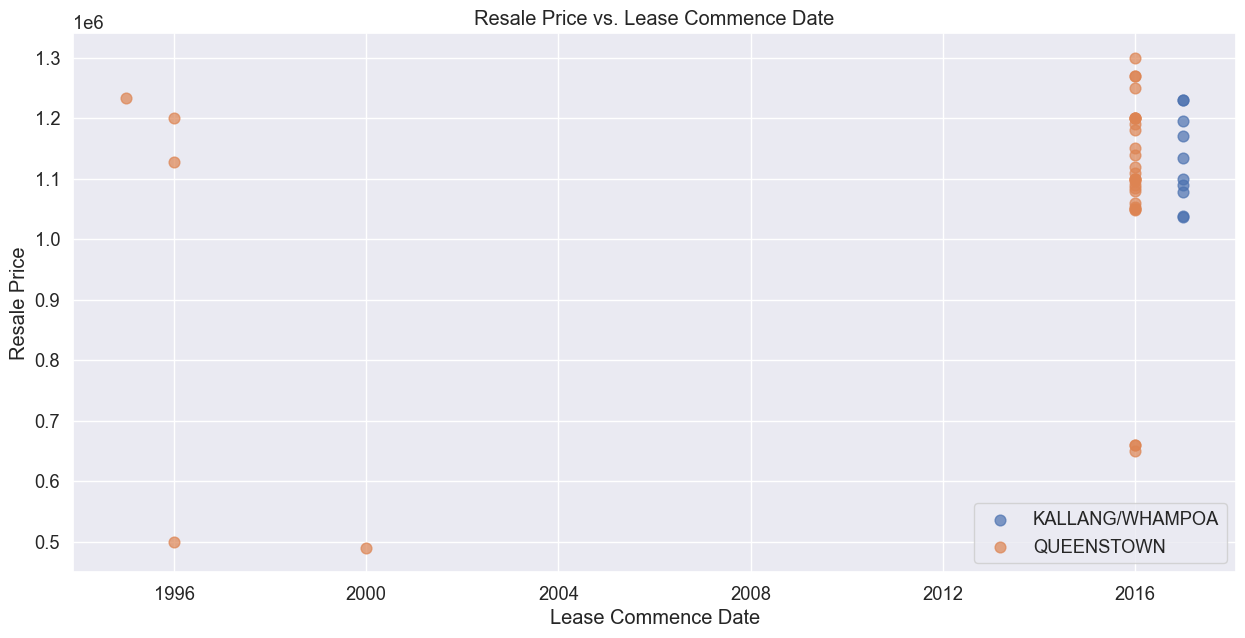

In [100]:



consolidated_outliers['lease_commence_date'] = pd.to_datetime(consolidated_outliers['lease_commence_date'])

# Filtering only the required models
filtered_df = consolidated_outliers[consolidated_outliers['flat_model'].isin(['Model A', 'Premium Apartment'])]

# Plotting
plt.figure(figsize=(15,7))
for town in ['KALLANG/WHAMPOA', 'QUEENSTOWN']:
    subset = filtered_df[filtered_df['Town'] == town]
    plt.scatter(subset['lease_commence_date'], subset['resale_price'], label=town, s=60, alpha=0.7)

plt.title('Resale Price vs. Lease Commence Date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Resale Price')
plt.legend()
plt.grid(True)
plt.show()




In [101]:
import pandas as pd

# Load the outlier data CSV files you previously saved
kallang_outliers_df = pd.read_csv('kallang_outliers.csv')
queenstown_outliers_df = pd.read_csv('queenstown_outliers.csv')

# Calculate the average prices for 4-room and 5-room flats in Kallang/Whampoa
kallang_4_room_avg = 668633
kallang_5_room_avg = 775099

# Calculate the average prices for 4-room and 5-room flats in Queenstown
queenstown_4_room_avg = 771120.634
queenstown_5_room_avg = 896575

# Calculate the average resale prices for outliers in Kallang/Whampoa
kallang_outliers_4_room_avg = kallang_outliers_df[kallang_outliers_df['flat_type'] == '4 ROOM']['resale_price'].mean()
kallang_outliers_5_room_avg = kallang_outliers_df[kallang_outliers_df['flat_type'] == '5 ROOM']['resale_price'].mean()

# Calculate the average resale prices for outliers in Queenstown
queenstown_outliers_4_room_avg = queenstown_outliers_df[queenstown_outliers_df['flat_type'] == '4 ROOM']['resale_price'].mean()
queenstown_outliers_5_room_avg = queenstown_outliers_df[queenstown_outliers_df['flat_type'] == '5 ROOM']['resale_price'].mean()

# Print the results
print("Average Prices for 4-Room and 5-Room Flats in Kallang/Whampoa:")
print(f"4-Room Average Price: {kallang_4_room_avg}")
print(f"5-Room Average Price: {kallang_5_room_avg}")

print("\nAverage Prices for 4-Room and 5-Room Flats in Queenstown:")
print(f"4-Room Average Price: {queenstown_4_room_avg}")
print(f"5-Room Average Price: {queenstown_5_room_avg}")

print("\nAverage Resale Prices for Outliers in Kallang/Whampoa:")
print(f"4-Room Outliers Average Price: {kallang_outliers_4_room_avg}")
print(f"5-Room Outliers Average Price: {kallang_outliers_5_room_avg}")

print("\nAverage Resale Prices for Outliers in Queenstown:")
print(f"4-Room Outliers Average Price: {queenstown_outliers_4_room_avg}")
print(f"5-Room Outliers Average Price: {queenstown_outliers_5_room_avg}")





Average Prices for 4-Room and 5-Room Flats in Kallang/Whampoa:
4-Room Average Price: 668633
5-Room Average Price: 775099

Average Prices for 4-Room and 5-Room Flats in Queenstown:
4-Room Average Price: 771120.634
5-Room Average Price: 896575

Average Resale Prices for Outliers in Kallang/Whampoa:
4-Room Outliers Average Price: 587112.0
5-Room Outliers Average Price: 1222472.0

Average Resale Prices for Outliers in Queenstown:
4-Room Outliers Average Price: 943611.0
5-Room Outliers Average Price: 1168927.0


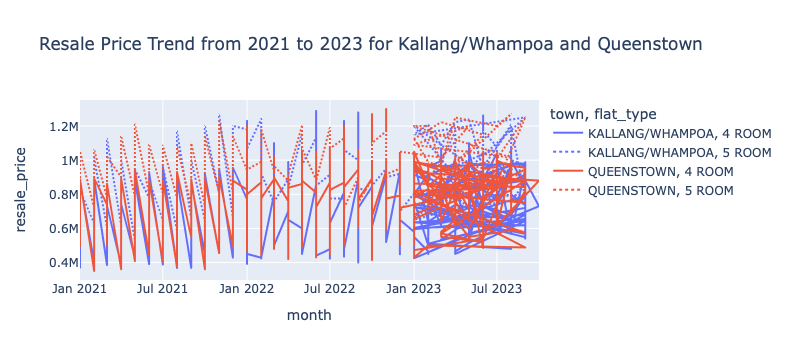

In [102]:
import plotly.express as px


# Filter data between 2021 and 2023
df_2021_2023 = selected_rows[selected_rows['year'].isin([2021, 2022, 2023])]

# Further filter the data for only 'Kallang/Whampoa' and 'Queenstown' and 4-room and 5-room flats
df_filtered_towns_flats = df_2021_2023[
    (df_2021_2023['town'].isin(['KALLANG/WHAMPOA', 'QUEENSTOWN'])) & 
    (df_2021_2023['flat_type'].isin(['4 ROOM', '5 ROOM']))
]

# Create the plot
fig = px.line(df_filtered_towns_flats, x='month', y='resale_price', color='town', 
              line_dash='flat_type', title='Resale Price Trend from 2021 to 2023 for Kallang/Whampoa and Queenstown')

# Show the plot
fig.show()


In [103]:
new_filtered.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
42844,2019-01-01,KALLANG/WHAMPOA,4 ROOM,11,FARRER PK RD,13 TO 15,90.0,Model A,2004-01-01,84,630000.0,2019
42846,2019-01-01,KALLANG/WHAMPOA,4 ROOM,38C,BENDEMEER RD,16 TO 18,89.0,Model A,2012-01-01,92,686888.0,2019
42847,2019-01-01,KALLANG/WHAMPOA,4 ROOM,3A,UPP BOON KENG RD,19 TO 21,90.0,Model A,2006-01-01,86,705000.0,2019
42848,2019-01-01,KALLANG/WHAMPOA,4 ROOM,38B,BENDEMEER RD,07 TO 09,92.0,Model A,2012-01-01,92,720000.0,2019
42849,2019-01-01,KALLANG/WHAMPOA,4 ROOM,8,BOON KENG RD,31 TO 33,95.0,DBSS,2011-01-01,91,870000.0,2019


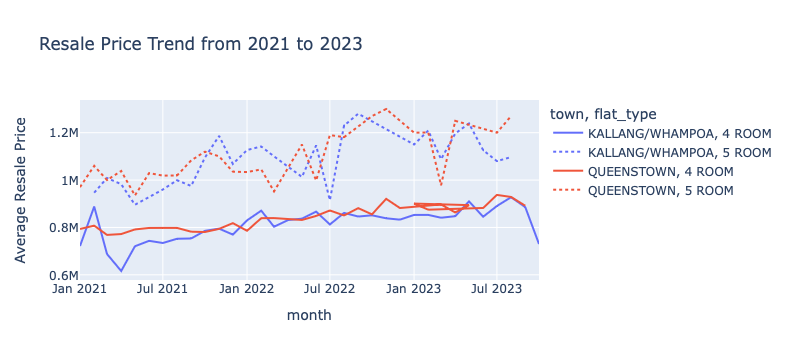

In [104]:
import plotly.express as px

# Assuming df_filtered_towns_flats_models contains your data

# Resample to compute the mean of data monthly (this step helps in capturing the trend at a monthly granularity)
df_filtered_towns_flats_models['monthly_mean'] = df_filtered_towns_flats_models.groupby(['month', 'town', 'flat_type'])['resale_price'].transform('mean')

# Drop duplicates to avoid plotting the same point multiple times
df_unique = df_filtered_towns_flats_models.drop_duplicates(subset=['month', 'town', 'flat_type'])

# Plot using plotly
fig = px.line(df_unique, 
              x='month', 
              y='monthly_mean', 
              color='town', 
              line_dash='flat_type', 
              title='Resale Price Trend from 2021 to 2023',
              labels={'monthly_mean': 'Average Resale Price'})

fig.show()





A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


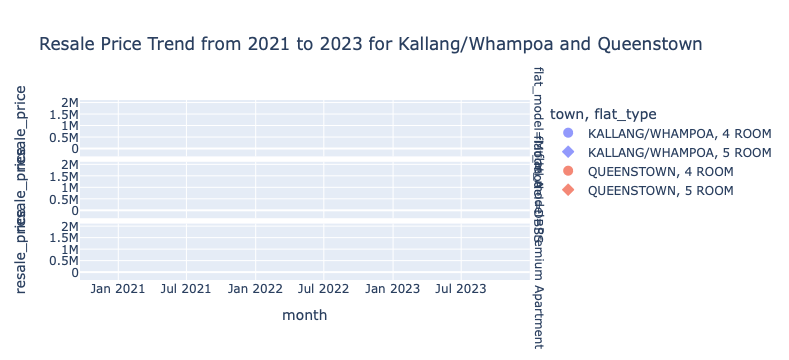

In [105]:
import plotly.express as px

# Filter data between 2021 and 2023
df_2021_2023 = new_filtered[new_filtered['year'].isin([2021, 2022, 2023])]

# Define the list of selected flat models
selected_flat_models = ['Model A', 'DBSS', 'Premium Apartment']

# Further filter the data for the desired conditions
df_filtered_towns_flats_models = df_2021_2023[
    (df_2021_2023['town'].isin(['KALLANG/WHAMPOA', 'QUEENSTOWN'])) & 
    (df_2021_2023['flat_type'].isin(['4 ROOM', '5 ROOM'])) &
    (df_2021_2023['flat_model'].isin(selected_flat_models))
]

# Convert lease_commence_date to a numeric value, like the year, for sizing
df_filtered_towns_flats_models['lease_commence_year'] = df_filtered_towns_flats_models['lease_commence_date'].dt.year

# Create the scatter plot
fig = px.scatter(df_filtered_towns_flats_models, 
                 x='month', 
                 y='resale_price', 
                 color='town',
                 size='lease_commence_year', # Represent lease_commence_date with the size of markers
                 symbol='flat_type',
                 facet_row='flat_model', # Facet by flat model on rows
                 title='Resale Price Trend from 2021 to 2023 for Kallang/Whampoa and Queenstown',
                 hover_data=['resale_price', 'lease_commence_date', 'town', 'flat_model', 'flat_type']) 

# Show the plot
fig.show()


In [106]:
# Get correlation of specific columns with 'resale_price'
correlations = df_filtered_towns_flats_models[['lease_commence_year', 'floor_area_sqm', 'remaining_lease', 'resale_price']].corr()
correlation_with_resale_price = correlations['resale_price'].drop('resale_price')

print(correlation_with_resale_price)


lease_commence_year    0.375066
floor_area_sqm         0.540843
remaining_lease        0.303307
Name: resale_price, dtype: float64


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


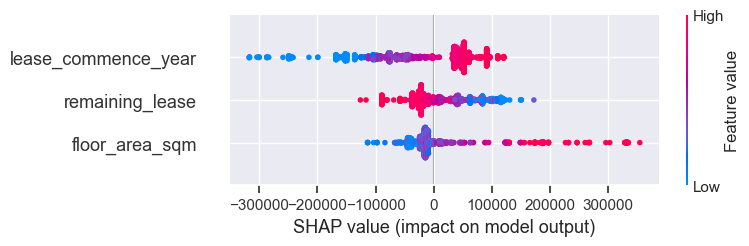

In [107]:
import shap
from sklearn.ensemble import GradientBoostingRegressor



# Extract relevant columns for training
X = df_filtered_towns_flats_models[['lease_commence_year', 'floor_area_sqm', 'remaining_lease',]]
y = df_filtered_towns_flats_models[['resale_price']]

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize SHAP values
shap.summary_plot(shap_values, X)

In [108]:
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Rank features by mean absolute SHAP value
ranked_features = pd.Series(mean_shap_values, index=X.columns).sort_values(ascending=False)

print(ranked_features)

lease_commence_year    75036.766939
remaining_lease        40814.725123
floor_area_sqm         37342.208002
dtype: float64
